# PLC comunication（Mitsubishi）  
2023.10.07 HAI技術士事務所

PLC機種：Mitsubishi FX5U-32MT/ES (三菱 iQ-Fシリーズ)  
PLCソフト：GX works3  

【１．Ethernet設定】  
　・GX-worksのナビゲーションからパラメータ→FX5UCPU→ユニットパラメータ→Eyhernetポートを開く。  
　・PLCのIPアドレス　192.168.1.10　サブネットマスク　255.255.255.0  
　・交信データコード　ASCII（XY16進）  

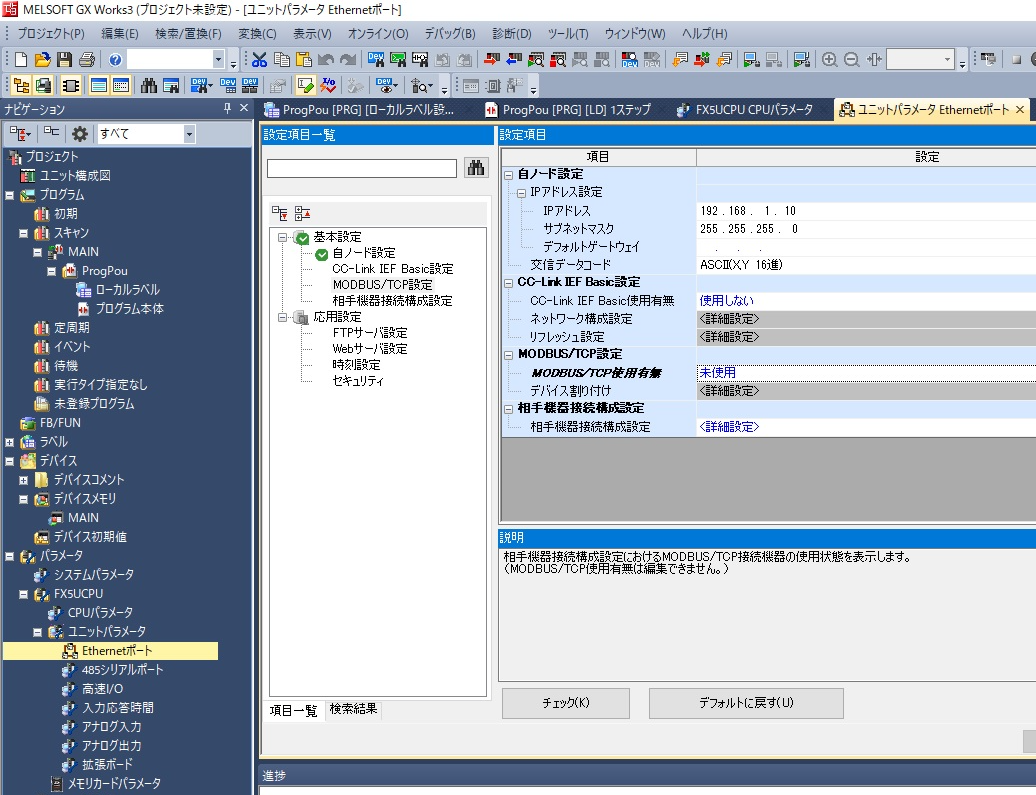

【２．接続機器設定】  
　・同じ画面の相手機器接続構成設定から青色の＜詳細設定＞をダブルクリック。
　・右側のユニット一覧からEthernet機器（汎用）を開き「SMLP接続機器」をドラッグ&ドロップで1つ足す。  
　交信手段：SMLP、プロトコル：TCP、アドレス：192.168.1.10、port：8500  

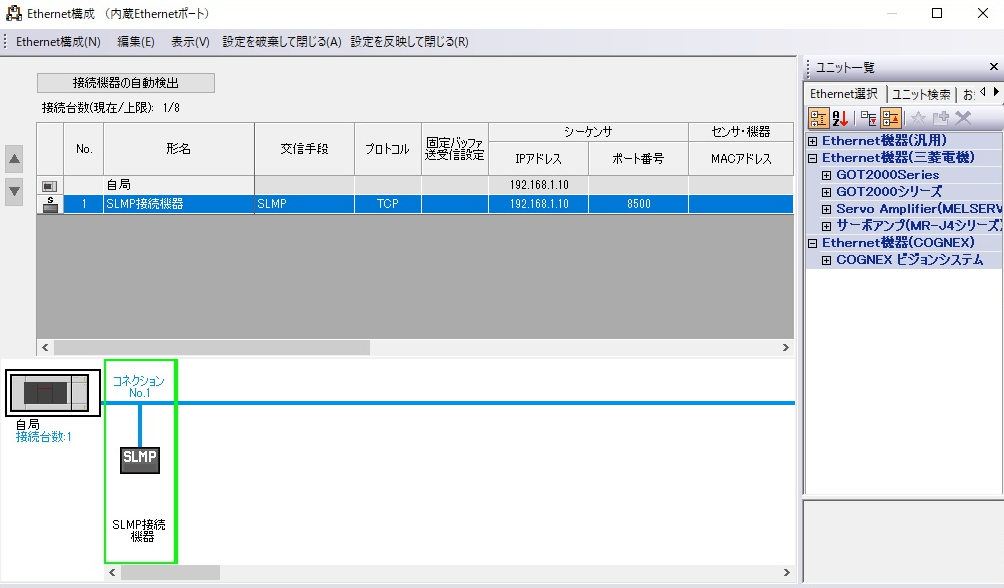

【３．メモリの確認】  
　・デバイス/バッファメモリ一括モニタを開く。デバイス名にD0と入力し「モニター開始」ボタンを押す。

### １．データメモリDMの読み込み　Read the value to DataMemory

In [ ]:
import socket

# IP_adress of PLC(connection destination)
host = '192.168.1.10'
port = 8500

#Setting TCP connection
client = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
client.connect((host,port))

# ------------------ Send message ----------------------
Sub_header = '5000'
network_number = '00'
PC_number = 'FF'
IO = '03FF'
kyokuban = '00'
data_length = '0018'   # Number of characters sent after 'CPUtimer' on hex (Dex=24)
CPU_timer = '0010'
Command = '0401'       # 0401=read,1401=write
sub_Command = '0000' 
DM = 'D*000020'        # DM20
data_number = '0001'   # data length for read

msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number
msg = msg.encode('utf-8')

# ------------------ send message ----------------------
client.send(msg)
response = client.recv(1024)
print('Send = ',msg)

print('Response = ',response)
print('Memory value = ',int(response[-1:]))
client.close()


### ２．データメモリDMへの書き込み　Write the value to DataMemory

In [ ]:
import socket

# IP_adress of PLC(connection destination)
host = '192.168.1.10'
port = 8500

# Setting TCP connection
client = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
client.connect((host,port))

# ------------------ Send message ----------------------
Sub_header = '5000'
network_number = '00'
PC_number = 'FF'
IO = '03FF'
kyokuban = '00'
data_length = '001C'    # # Number of characters sent after 'CPUtimer' on hex (Dex=28)
CPU_timer = '0020'
Command = '1401'        # 0401=read,1401=write
sub_Command = '0000' 
DM = 'D*000020'         # DM20
data_number = '0001'  
data = '0005'           # data for write

msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number+data

msg = msg.encode('utf-8')

# ------------------ send message ----------------------
client.send(msg)
response = client.recv(1024)
print(response)

client.close()

### ３．関数化

In [ ]:
import socket

# read DM
def read_DM(DM):
    # IP_adress of PLC(connection destination)
    host = '192.168.1.10'
    port = 8500

    # Setting TCP connection
    client = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
    client.connect((host,port))

    # ------------------ Send message ----------------------
    Sub_header = '5000'
    network_number = '00'
    PC_number = 'FF'
    IO = '03FF'
    kyokuban = '00'
    data_length = '0018'   # hex
    CPU_timer = '0010'
    Command = '0401'       # 0401=read,1401=write
    sub_Command = '0000' 
    DM = DM        
    data_number = '0001'   # data length for read

    msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number
    msg = msg.encode('utf-8')

    # ------------------ send message ----------------------
    client.send(msg)
    response = client.recv(1024)
    client.close()
    
    return int(response[-1:])

In [ ]:
# ex) read DM10 value
DM = 'D*000009'

read_DM(DM)

In [ ]:
import socket

# Write DM
def write_DM(DM,data):
    # IP_adress of PLC(connection destination)
    host = '192.168.1.10'
    port = 8500

    # Setting TCP connection
    client = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
    client.connect((host,port))

    # ------------------ Send message ----------------------
    Sub_header = '5000'
    network_number = '00'
    PC_number = 'FF'
    IO = '03FF'
    kyokuban = '00'
    data_length = '001C'    # hex
    CPU_timer = '0020'
    Command = '1401'        # 0401=read,1401=write
    sub_Command = '0000' 
    DM = DM
    data_number = '0001'  
    data = data

    msg = Sub_header+network_number+PC_number+IO+kyokuban+data_length+CPU_timer+Command+sub_Command+DM+data_number+data
    msg = msg.encode('utf-8')

    # ------------------ send message ----------------------
    client.send(msg)
    response = client.recv(1024)

    client.close()
    
    return

In [ ]:
# ex) write 0005 to DM10
DM,data = 'D*000000','0002'

write_DM(DM,data)